In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn.datasets
import pandas as pd
import numpy as np

housingData = sklearn.datasets.fetch_california_housing()
housing = pd.DataFrame(housingData.data, columns=housingData.feature_names)
print "\n housing.head()\n", housing.head()
print "\n housing.info()\n", housing.info()
print "\n housing.describe()\n", housing.describe()


 housing.head()
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

 housing.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64

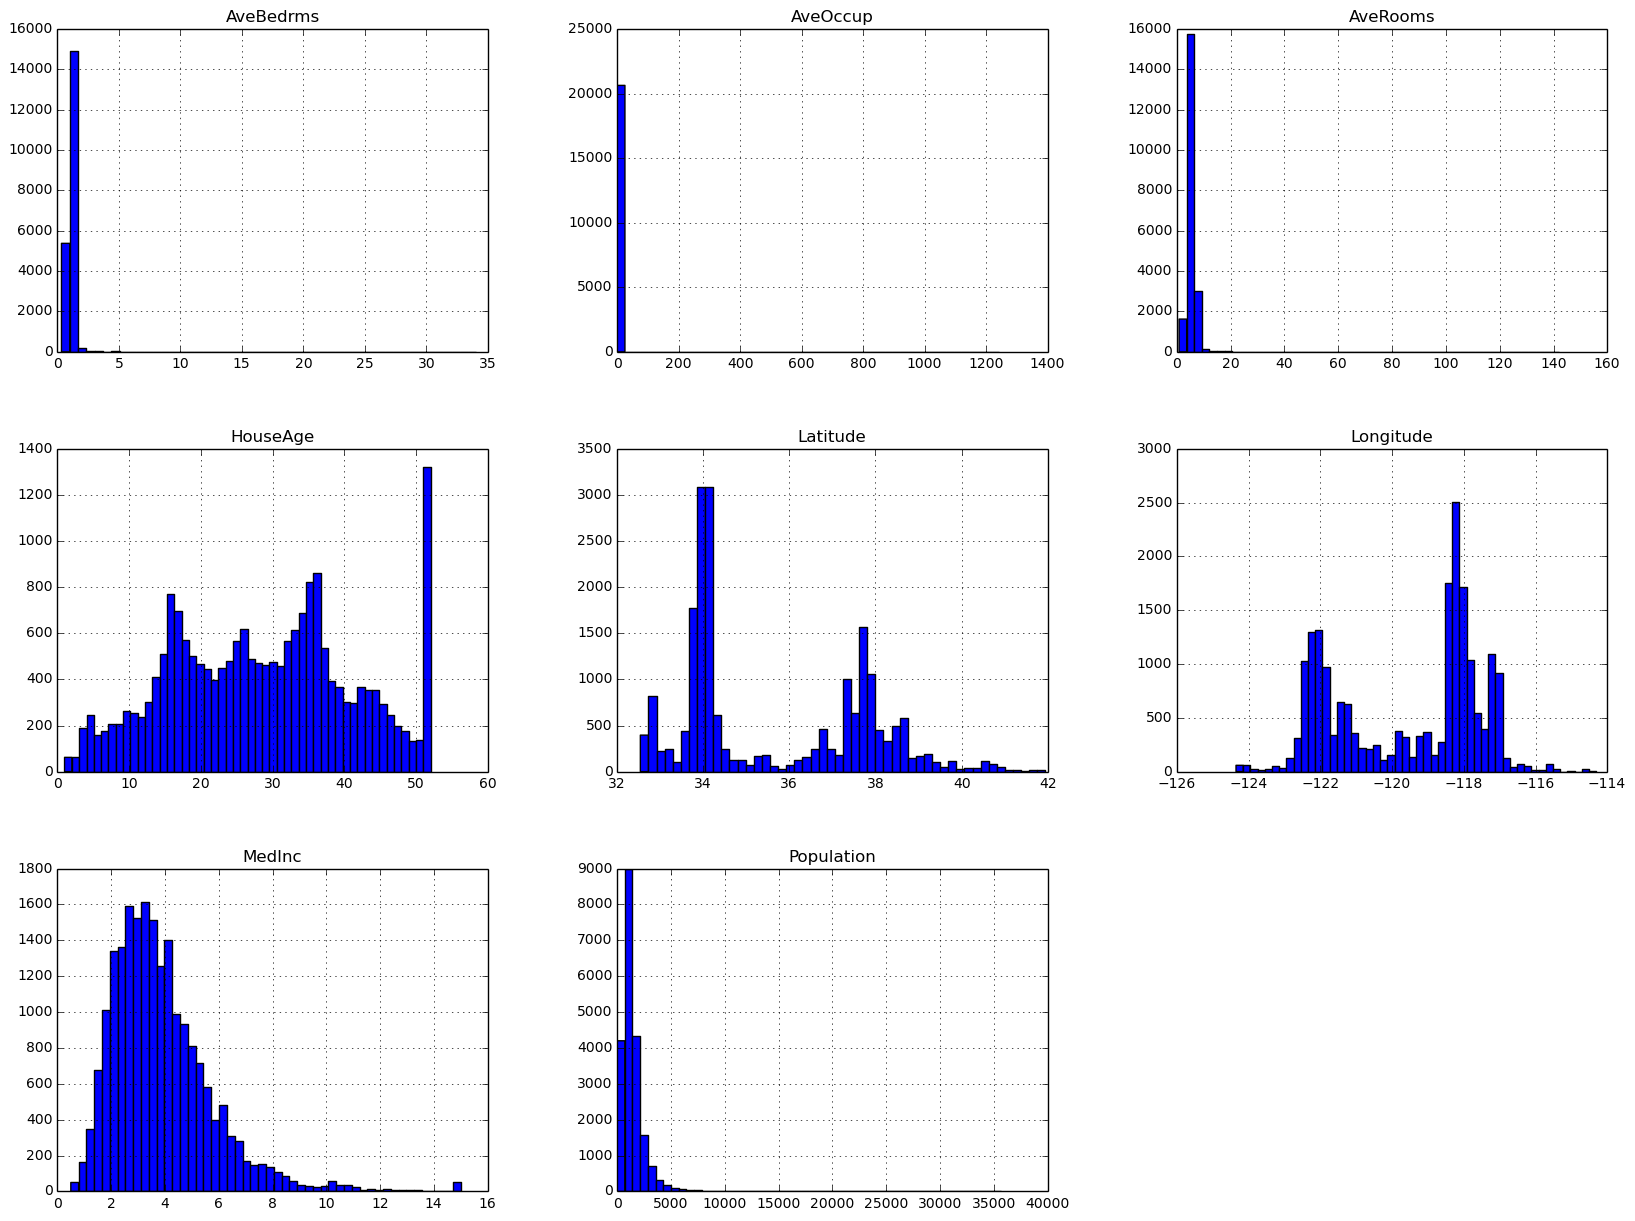

In [27]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

housing["income_cat"] = np.ceil(housing["MedInc"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


In [43]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.875589     28.653101      5.440341      1.098427   1419.790819   
std        1.904950     12.574726      2.611712      0.507070   1115.686241   
min        0.499900      1.000000      1.130435      0.333333      3.000000   
25%        2.566775     18.000000      4.442040      1.005857    784.000000   
50%        3.540900     29.000000      5.232284      1.048611   1164.000000   
75%        4.744475     37.000000      6.056361      1.099057   1719.250000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  16512.000000  16512.000000  16512.000000  
mean       3.096437     35.639577   -119.575834  
std       11.584826      2.138058      2.001860  
min        0.692308     32.540000   -124.350000  
25%        2.431287     33.940000   -1

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


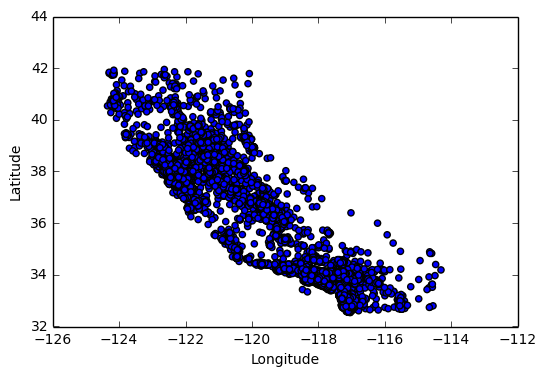

In [48]:
housing=strat_train_set.copy()
print housing.describe()
housing.plot(kind="scatter", x="Longitude", y="Latitude")
plt.show()